In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

--2022-10-29 05:14:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   244MB/s    in 0.8s    

2022-10-29 05:14:36 (244 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip


--2022-10-29 05:14:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  22.6MB/s    in 1.2s    

2022-10-29 05:14:38 (22.6 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [ ]:
import zipfile
import os

dir_name = "training"
os.mkdir(dir_name)
path = "rps.zip"

zipref = zipfile.ZipFile(path)
zipref.extractall(path = dir_name)
zipref.close()

In [ ]:
dir_name = "validation"
os.mkdir(dir_name)
path = "rps-test-set.zip"

zipref = zipfile.ZipFile(path)
zipref.extractall(path = dir_name)
zipref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   shear_range= 0.2,
                                   horizontal_flip= True,
                                   vertical_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir_path = "training/rps"
valid_dir_path = "validation/rps-test-set"

train_data = train_datagen.flow_from_directory(train_dir_path,
                                               target_size = (150,150),
                                               class_mode='categorical',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(valid_dir_path,
                                               target_size = (150,150),
                                               class_mode = 'categorical',
                                               seed = 42)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
from pathlib import Path
class_name = np.array(sorted(item.name for item in Path("training/rps").glob("*")))
print(class_name)

['paper' 'rock' 'scissors']


In [ ]:
def plot_model(history):
  # Plot the accuracy
  plt.plot(history.history["accuracy"], label = "Training")
  plt.plot(history.history["val_accuracy"], label = "Validation")
  plt.title("Accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

  # Plot the loss
  plt.plot(history.history["loss"], label = "Training")
  plt.plot(history.history["val_loss"], label = "Validation")
  plt.title("Loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

In [ ]:
model_1 = Sequential([
    layers.Conv2D(16,3, activation = "relu", input_shape = (150,150,3)),
    layers.Conv2D(32,3,activation = "relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(64,3, activation = "relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(64,3, activation = "relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(64,3, activation = "relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(300, activation = "relu"),
    layers.Dense(3, activation = "softmax")
])

model_1.compile(loss = "categorical_crossentropy",
                optimizer = "rmsprop",
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                      epochs = 15,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))


Epoch 1/15
79/79 [==============================] - 22s 268ms/step - loss: 1.2772 - accuracy: 0.3540 - val_loss: 1.0759 - val_accuracy: 0.3763
Epoch 2/15
79/79 [==============================] - 22s 275ms/step - loss: 1.0448 - accuracy: 0.4563 - val_loss: 0.6721 - val_accuracy: 0.8333
Epoch 3/15
79/79 [==============================] - 21s 264ms/step - loss: 0.8492 - accuracy: 0.6206 - val_loss: 0.4173 - val_accuracy: 0.8952
Epoch 4/15
79/79 [==============================] - 21s 266ms/step - loss: 0.6245 - accuracy: 0.7440 - val_loss: 0.3321 - val_accuracy: 0.9059
Epoch 5/15
79/79 [==============================] - 21s 265ms/step - loss: 0.4944 - accuracy: 0.8056 - val_loss: 0.2939 - val_accuracy: 0.8441
Epoch 6/15
79/79 [==============================] - 21s 262ms/step - loss: 0.3803 - accuracy: 0.8683 - val_loss: 0.1988 - val_accuracy: 0.9220
Epoch 7/15
79/79 [==============================] - 21s 264ms/step - loss: 0.2822 - accuracy: 0.8988 - val_loss: 0.2055 - val_accuracy: 0.8871

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 33, 64)       

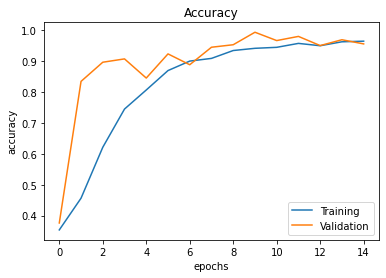

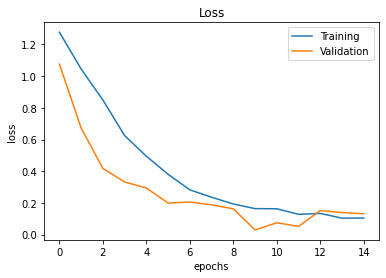

In [ ]:
plot_model(history_1)

In [ ]:
def load_and_prep_data(filename, filesize = [150,150]):
  # read the images
  img = tf.io.read_file(filename)
  # decode the images
  img = tf.image.decode_image(img)
  # resize the image 
  img = tf.image.resize(img , size = filesize)
  img = img/255.
  # expand the dims
  img = tf.expand_dims(img, axis = 0)

  return img


In [ ]:

def evaluate(classe, filename):
  classes = np.round(classe)

  if(classes[0][0]==1):
    print("paper")
  elif(classes[0][1] ==1):
    print("Rock")
  else:
    print("scissior")

  fig = mpimg.imread(filename)
  plt.imshow(fig)
  plt.axis("off")

  return classes


1/1 [==============================] - 0s 19ms/step
paper


array([[1., 0., 0.]], dtype=float32)

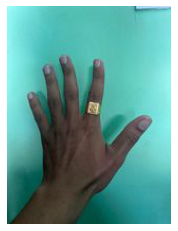

In [ ]:
img1 = load_and_prep_data("paper.jpg")
classe = model_1.predict(img1)
evaluate(classe, "paper.jpg")

1/1 [==============================] - 0s 16ms/step
Rock


array([[0., 1., 0.]], dtype=float32)

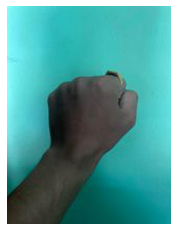

In [ ]:
img2 =  load_and_prep_data("rock.jpg")
predict = model_1.predict(img2)
evaluate(predict, "rock.jpg")

1/1 [==============================] - 0s 15ms/step
scissior


array([[0., 0., 1.]], dtype=float32)

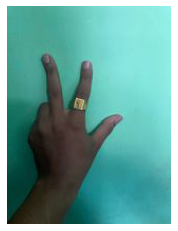

In [ ]:
img3 =  load_and_prep_data("scissior.jpg")
predict = model_1.predict(img3)
evaluate(predict, "scissior.jpg")